In [ ]:
# Install Libraries
!pip install text2emotion
!pip install raceplotly
!pip install --upgrade plotly

     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 133kB 7.3MB/s 
     |████████████████████████████████| 13.2MB 319kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
# Import Libraries
import os
import re
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import text2emotion as te
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython.display import clear_output
import matplotlib.pyplot as plt
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vad

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
data=pd.read_csv('reddit_wsb.csv')
data.head()

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.drop('id', inplace=True, axis=1)
data.drop('url', inplace=True, axis=1)
data.drop('created', inplace=True, axis=1)
data.drop('comms_num', inplace=True, axis=1)
data.head(5)

,title,score,body,timestamp
2,Exit the system,0,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27
7,THIS IS THE MOMENT,405,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31
10,"We need to keep this movement going, we all ca...",222,I believe right now is one of those rare oppo...,2021-01-28 21:18:25
12,"Once you're done with GME - $AG and $SLV, the ...",0,You guys are champs. GME... who would have tho...,2021-01-28 21:17:10


In [ ]:
print(data.groupby(['title']).size().sort_values())


title
Keep calm and load up on GME                                                                                                                                                                                 1
Robinhood has officially stole from the poor and gave to the rich. This is twisted. Don't let them get away with it, submit your complaint about their market manipulation here: https://www.sec.gov/tcr     1
Robinhood has removed GME from trading altogether! I am done with them!                                                                                                                                      1
Robinhood has removed support for BB, GME, AMC, and others                                                                                                                                                   1
Robinhood has restricted trading to AMERICAN AIRLINES                                                                                                                 

In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
data_title = data['title'].apply(lambda x:str(x).split())
top = Counter([item for sublist in data_title for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,4602
1,to,4128
2,and,2644
3,GME,2382
4,is,2273
5,a,2111
6,of,1948
7,I,1947
8,on,1688
9,for,1546


In [ ]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
#Remove Stop words
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
data_title = data_title.apply(lambda x:remove_stopword(x))

In [ ]:
top = Counter([item for sublist in data_title for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,I,1947
2,THE,962
3,-,955
4,Robinhood,949
5,AMC,892
6,buy,776
7,The,773
8,HOLD,605
9,BUY,599
10,TO,572


In [ ]:
data_title.to_csv('final_project.csv')

In [ ]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [ ]:
# Proprocessing the data
data['title']=data['title'].str.lower()
# Code to remove the Hashtags from the text
data['title']=data['title'].apply(lambda x:re.sub(r'\B#\S+','',x))
# Code to remove the links from the text
data['title']=data['title'].apply(lambda x:re.sub(r"http\S+", "", x))
# Code to remove the Special characters from the text 
data['title']=data['title'].apply(lambda x:' '.join(re.findall(r'\w+', x)))
# Code to substitute the multiple spaces with single spaces
data['title']=data['title'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
# Code to remove all the single characters in the text
data['title']=data['title'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
# Remove the twitter handlers
data['title']=data['title'].apply(lambda x:re.sub('@[^\s]+','',x))

In [ ]:
data=data[['title']]

In [ ]:
# Invoking the TFIDFVectorizer
tf_data=TfidfVectorizer()
# Copying the data into a new dataframe called vader
vader=data.copy()

sentiment=vad()
# Making additional columns for sentiment score in the vader dataframe
sen=['Positive','Negative','Neutral']
sentiments=[sentiment.polarity_scores(i) for i in vader['title'].values]
vader['Negative Score']=[i['neg'] for i in sentiments]
vader['Positive Score']=[i['pos'] for i in sentiments]
vader['Neutral Score']=[i['neu'] for i in sentiments]
vader['Compound Score']=[i['compound'] for i in sentiments]
score=vader['Compound Score'].values
t=[]
for i in score:
    if i >=0.05 :
        t.append('Positive')
    elif i<=-0.05 :
        t.append('Negative')
    else:
        t.append('Neutral')
vader['Overall Sentiment']=t

In [ ]:
vader.head()

,title,Negative Score,Positive Score,Neutral Score,Compound Score,Overall Sentiment
2,exit the system,0.0,0.0,1.0,0.0,Neutral
6,short stock doesnhave an expiration date,0.0,0.0,1.0,0.0,Neutral
7,this is the moment,0.0,0.0,1.0,0.0,Neutral
10,we need to keep this movement going we all can...,0.0,0.0,1.0,0.0,Neutral
12,once you re done with gme ag and slv the gentl...,0.0,0.0,1.0,0.0,Neutral


NameError: ignored

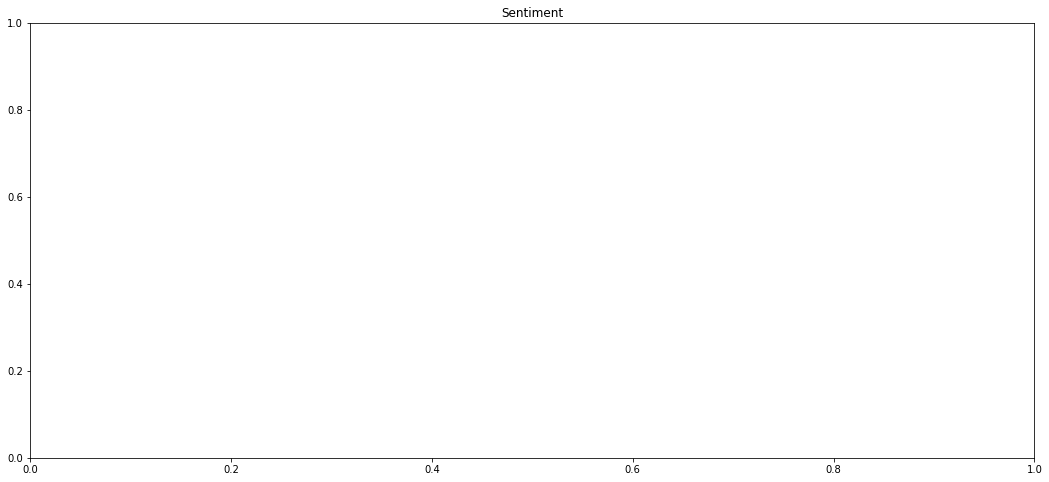

In [ ]:
plt.figure(figsize=(18,8))
plt.title('Sentiment')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
fig=px.histogram(data_frame=vader,x='Compound Score',color='Overall Sentiment',template='plotly')
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



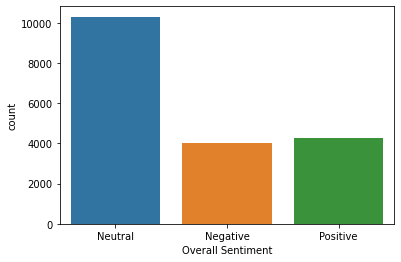

In [ ]:
sns.countplot(vader['Overall Sentiment'])